In [1]:
# 📓 Feature Engineering Notebook for DevOps Learners

# ---
# 🧪 Imports
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# ---
# 📥 Load Cleaned Data
df = pd.read_csv("../data/processed/cleaned_house_data.csv")
df.head()


,Unnamed: 0,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,0,495000,1527,2,1.5,Suburb,1956,Good
1,1,752000,2526,3,2.5,Downtown,1998,Excellent
2,2,319000,1622,2,1.5,Rural,1975,Fair
3,3,1210000,3102,4,3.0,Waterfront,2005,Excellent
4,4,462000,1835,2,2.0,Urban,1982,Good


In [5]:
# Print dataset shape: rows × columns
print("Dataset shape (colums, rows):", df.shape)

# Print summary of column names, types, null counts, etc.
print(df.info())

Dataset shape (colums, rows): (84, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  84 non-null     int64  
 1   price       84 non-null     int64  
 2   sqft        84 non-null     int64  
 3   bedrooms    84 non-null     int64  
 4   bathrooms   84 non-null     float64
 5   location    84 non-null     object 
 6   year_built  84 non-null     int64  
 7   condition   84 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 5.4+ KB
None


In [6]:
df.describe()

,Unnamed: 0,price,sqft,bedrooms,bathrooms,year_built
count,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,41.500000,6.285595e+05,2191.500000,2.857143,2.190476,1982.047619
std,24.392622,3.591678e+05,650.017117,0.852252,0.828356,19.501563
min,0.000000,2.490000e+05,1350.000000,2.000000,1.000000,1947.000000
25%,20.750000,3.742500e+05,1695.000000,2.000000,1.500000,1965.000000
50%,41.500000,5.110000e+05,1995.000000,3.000000,2.000000,1982.500000
75%,62.250000,7.292500e+05,2590.000000,3.000000,2.500000,1995.500000
max,83.000000,1.680000e+06,3850.000000,5.000000,4.500000,2019.000000


In [7]:
# ---
# 🎯 Feature Engineering (Human-Readable)

# Feature 1: Age of the house
df['house_age'] = datetime.now().year - df['year_built']

# Feature 2: Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft']

# Feature 3: Ratio of bedrooms to bathrooms
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

# Handle division by zero and infinite values
df['bed_bath_ratio'] = df['bed_bath_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 📊 Quick Look at Engineered Data
df[['house_age', 'price_per_sqft', 'bed_bath_ratio']].describe()

,house_age,price_per_sqft,bed_bath_ratio
count,84.000000,84.000000,84.000000
mean,42.952381,268.090387,1.362519
std,19.501563,67.742970,0.262230
min,6.000000,179.761905,1.000000
25%,29.500000,229.436507,1.200000
50%,42.500000,254.326923,1.333333
75%,60.000000,279.782904,1.500000
max,78.000000,436.363636,2.000000


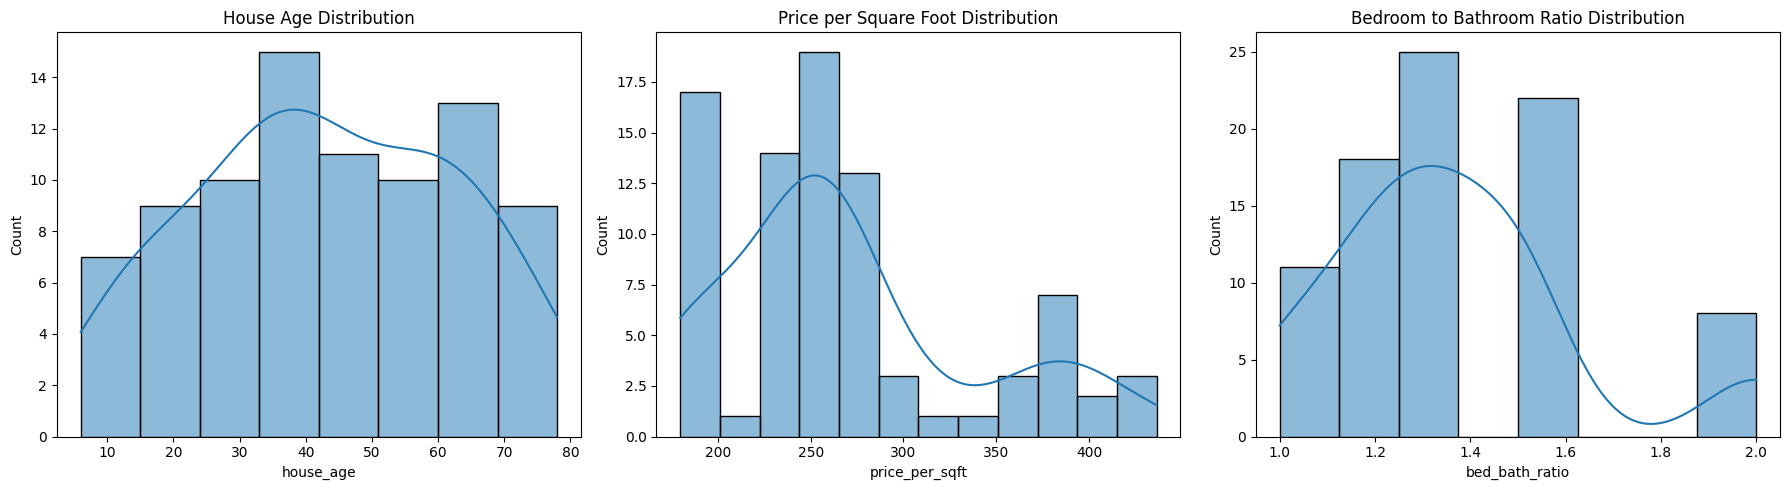

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['house_age'], kde= True, ax= axs[0])
axs[0].set_title('House Age Distribution')

sns.histplot(df['price_per_sqft'], kde= True, ax= axs[1])
axs[1].set_title('Price per Square Foot Distribution')

sns.histplot(df['bed_bath_ratio'], kde= True, ax= axs[2])
axs[2].set_title('Bedroom to Bathroom Ratio Distribution')

plt.tight_layout()
plt.show()

In [9]:
selected_columns = [
    'price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition',
    'house_age', 'price_per_sqft', 'bed_bath_ratio'
]

df[selected_columns].to_csv("../data/processed/data_scientists_features.csv", index=False)
print("✅ Saved human-readable engineered features to ../data/processed/data_scientists_features.csv")

✅ Saved human-readable engineered features to ../data/processed/data_scientists_features.csv
